In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('sample.csv' , encoding='latin1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
X = df[['Sales', 'Quantity', 'Discount']]
y = df['Profit']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]


In [8]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [9]:
def gradient_descent(X, y, theta, learning_rate, num_iterations, batch_size=None):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        if batch_size is None:  # Batch Gradient Descent
            gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        elif batch_size == 1:  # Stochastic Gradient Descent
            random_index = np.random.randint(m)
            xi = X[random_index:random_index + 1]
            yi = y.iloc[random_index:random_index + 1]  # Use .iloc to avoid KeyError
            gradients = xi.T.dot(xi.dot(theta) - yi)
        else:  # Mini-Batch Gradient Descent
            random_indices = np.random.choice(m, batch_size, replace=False)  # Ensure unique indices
            xi = X[random_indices]
            yi = y.iloc[random_indices]  # Use .iloc to avoid KeyError
            gradients = (1 / batch_size) * xi.T.dot(xi.dot(theta) - yi)

        theta -= learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history


In [10]:
# Initialize parameters
theta = np.zeros(X_train_scaled.shape[1])  # Initialize weights (including bias)
learning_rate = 0.01
num_iterations = 1000


In [11]:
# Mini-Batch Gradient Descent
print("Training with Mini-Batch Gradient Descent...")
theta_mini_batch, cost_history_mini_batch = gradient_descent(
    X_train_scaled, y_train, theta, learning_rate, num_iterations, batch_size=32
)


Training with Mini-Batch Gradient Descent...


In [12]:
# Batch Gradient Descent
print("Training with Batch Gradient Descent...")
theta_batch, cost_history_batch = gradient_descent(
    X_train_scaled, y_train, theta, learning_rate, num_iterations, batch_size=None
)


Training with Batch Gradient Descent...


In [13]:
# Stochastic Gradient Descent
print("Training with Stochastic Gradient Descent...")
theta_stochastic, cost_history_stochastic = gradient_descent(
    X_train_scaled, y_train, theta, learning_rate, num_iterations, batch_size=1
)

Training with Stochastic Gradient Descent...


In [14]:
# Evaluate the models
def evaluate_model(theta, X_test, y_test):
    predictions = X_test.dot(theta)
    mse = mean_squared_error(y_test, predictions)
    return mse

In [16]:
# Evaluate Mini-Batch Gradient Descent
mse_mini_batch = evaluate_model(theta_mini_batch, X_test_scaled, y_test)
print(f"Mini-Batch Gradient Descent - Mean Squared Error: {mse_mini_batch}")

Mini-Batch Gradient Descent - Mean Squared Error: 59698.64764756322


In [17]:
# Evaluate Batch Gradient Descent
mse_batch = evaluate_model(theta_batch, X_test_scaled, y_test)
print(f"Batch Gradient Descent - Mean Squared Error: {mse_batch}")


Batch Gradient Descent - Mean Squared Error: 59698.64764756322


In [18]:
# Evaluate Stochastic Gradient Descent
mse_stochastic = evaluate_model(theta_stochastic, X_test_scaled, y_test)
print(f"Stochastic Gradient Descent - Mean Squared Error: {mse_stochastic}")


Stochastic Gradient Descent - Mean Squared Error: 59698.64764756322


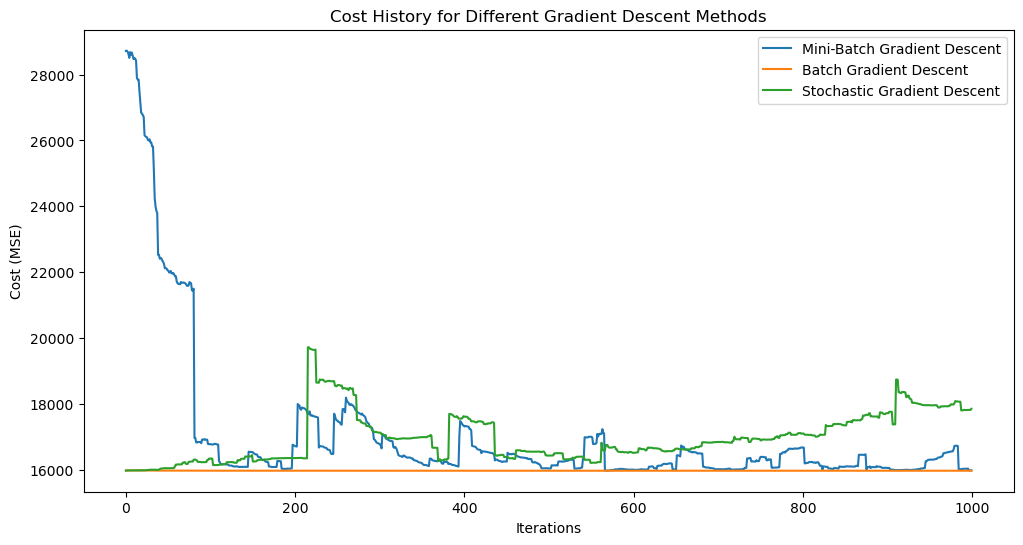

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(cost_history_mini_batch, label='Mini-Batch Gradient Descent')
plt.plot(cost_history_batch, label='Batch Gradient Descent')
plt.plot(cost_history_stochastic, label='Stochastic Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost History for Different Gradient Descent Methods')
plt.legend()
plt.show()